In [1]:
import sys
sys.path.append('/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks')
import pandas as pd
from datetime import datetime
from systems.datafetcher import DataFetcher
from systems.utils import create_logger, sleeper, load_symbols_universe_df, MarketDataExtractor
import numpy as np

In [2]:
interval_inputs = {'1d': {'columns': ['open', 'high', 'close', 'volume'], 'lookback': 100}}
start_date = pd.Timestamp(datetime(2010,1,1)).tz_localize('UTC').tz_convert('EST')
end_date = pd.Timestamp(datetime(2019,11,30)).tz_localize('UTC').tz_convert('EST')
lookback = {'1d': 100}
market_data_extractor = MarketDataExtractor()
list_of_symbols = ['D', 'IDXX', 'F', 'WM', 'UBER', 'COP', 'RBLX', 'HWM', 'FCNCA', 'CCL', 'NXPI', 'HBANM', 'SPGI', 'CMI', 'CVS', 'TMUS', 'ALL', 'TSM', 'GIS', 'CPRT', 'LNG', 'MDT', 'EOG', 'DUK', 'MCO', 'ARM', 'IT', 'BAC', 'YUM', 'VRT', 'ALNY', 'ABT', 'WTW', 'USB', 'CME', 'IR', 'MO', 'UNP', 'RACE', 'NU', 'WELL', 'MSTR', 'NGG', 'ASML', 'AXON', 'FMX', 'BMO', 'LOW', 'DEO', 'ANET', 'HLT', 'CCEP', 'ELV', 'AEP', 'PCAR', 'VEEV', 'TM', 'CVX', 'PEG', 'BA', 'PGR', 'ORLY', 'WEC', 'TTE', 'SNPS', 'NDAQ', 'DB', 'TRP', 'GEV', 'CDNS', 'CEG', 'PCG', 'BK', 'COST', 'PANW', 'ARGX', 'DHI', 'DELL', 'ADP', 'CMG', 'O', 'VALE', 'RSG', 'CMCSA', 'FCX', 'STLA', 'EXR', 'HPQ', 'XYL', 'NEE', 'VZ', 'BMY', 'KMB', 'MSI', 'HDB', 'MPC', 'BABA', 'ORCL', 'WCN', 'SYY', 'EW', 'OWL', 'AAPL', 'XEL', 'DLR', 'TEAM', 'JD', 'SPOT', 'GWW', 'HSY', 'CNI', 'TBC', 'UPS', 'AMX', 'AMZN', 'TMO', 'ARES', 'HUBS', 'SHEL', 'ROP', 'VMC', 'EXC', 'PFE', 'DAL', 'ETR', 'KR', 'FICO', 'RCL', 'VRTX', 'MSFT', 'BSX', 'LVS', 'ITUB', 'HMC', 'ABEV', 'NWG', 'BRO', 'RJF', 'MFC', 'VRSK', 'SCHW', 'LMT', 'BDX', 'DIS', 'BP', 'MPLX', 'TFC', 'FLUT', 'DDOG', 'TSLA', 'CM', 'APO', 'ROK', 'KVUE', 'BLK', 'IRM', 'RELX', 'DD', 'FERG', 'ZS', 'CSGP', 'TDG', 'INFY', 'XOM', 'ISRG', 'TTWO', 'PLTR', 'DOW', 'ICE', 'NTES', 'PNC', 'KDP', 'NSC', 'GOOG', 'SRE', 'CHTR', 'BSBR', 'HEI', 'SHW', 'MMM', 'JNJ', 'CCI', 'DE', 'NET', 'NVDA', 'DHR', 'IMO', 'SPG', 'SHOP', 'PSX', 'CRWD', 'RTX', 'IBN', 'UBS', 'WDAY', 'OXY', 'HSBC', 'JCI', 'COIN', 'SO', 'WIT', 'AMAT', 'HD', 'NEM', 'INTC', 'AMP', 'AVB', 'PWR', 'CSX', 'PAYX', 'MCHP', 'PM', 'CP', 'MRVL', 'BHP', 'EMR', 'EA', 'CARR', 'EIX', 'EFX', 'FDX', 'PDD', 'V', 'BX', 'SE', 'ING', 'AMGN', 'BKR', 'TCOM', 'NOC', 'ED', 'HUM', 'MA', 'SLF', 'GLW', 'WFC', 'CRH', 'META', 'AJG', 'CTAS', 'INTU', 'EQNR', 'HLN', 'APP', 'HIG', 'NKE', 'ALC', 'LLY', 'CB', 'NUE', 'SQ', 'APH', 'PBR', 'TRI', 'BN', 'PLD', 'OTIS', 'MFG', 'AZO', 'AEM', 'UAL', 'ROST', 'ABBV', 'RIO', 'COF', 'AZN', 'T', 'LRCX', 'TJX', 'SMFG', 'BNS', 'TRV', 'SNOW', 'TTD', 'URI', 'TSCO', 'E', 'APD', 'CBRE', 'TD', 'AON', 'GEHC', 'PSA', 'LYG', 'FAST', 'AXP', 'LHX', 'FANG', 'REGN', 'MRK', 'MMC', 'TRGP', 'TXN', 'A', 'SLB', 'MELI', 'CL', 'LULU', 'STZ', 'BBVA', 'FIS', 'CCZ', 'PRU', 'BUD', 'DASH', 'CVNA', 'ABNB', 'LEN', 'WMB', 'UNH', 'ETN', 'IQV', 'HBANL', 'SAN', 'MU', 'ODFL', 'CTVA', 'PH', 'MSCI', 'SU', 'SAP', 'TW', 'MCK', 'CTSH', 'FITB', 'MAR', 'AMD', 'CNQ', 'TAK', 'UL', 'C', 'WMT', 'MS', 'SBUX', 'KKR', 'VICI', 'AIG', 'HCA', 'RMD', 'IBM', 'MET', 'EPD', 'AMT', 'GM', 'SYK', 'MCD', 'AME', 'PG', 'SNY', 'WAB', 'SCCO', 'ADBE', 'HES', 'DFS', 'ADI', 'GOOGL', 'GILD', 'VLO', 'ITW', 'VST', 'TEL', 'PYPL', 'MLM', 'GSK', 'MTB', 'ET', 'FTNT', 'ONON', 'AFL', 'KLAC', 'ZTS', 'GS', 'CPNG', 'SONY', 'CRM', 'GD', 'ACN', 'NVO', 'PEP', 'TBB', 'NVS', 'BCS', 'MUFG', 'OKE', 'ENB', 'AVGO', 'CAT', 'KO', 'TGT', 'FI', 'ADSK', 'KMI', 'CI', 'CUK', 'NFLX', 'GRMN', 'BKNG', 'CSCO', 'JPM', 'GE', 'EQIX', 'BTI', 'HON', 'COR', 'KHC', 'RY', 'ACGL', 'NOW', 'QCOM', 'TT', 'MDLZ', 'ECL']
# list_of_symbols = list_of_symbols[:10]
config_dict = {'run_mode': 3, 'base_currency': 'CAD', 'trading_currency': 'USD', 'base_currency_to_trading_currency_exchange_rate': 0.7246376811594204, 'backtest_inputs': {'start_time': start_date, 'end_time': end_date, 'save_backtest_results': True}, 'strategies': ['strategy_dev.strategy_3_1'], 'data_update_inputs': {'data_sources': {'sim': 'ibkr', 'live': 'ibkr'}}, 'sleep_time': 60, 'account_info': {'ibkr': {'DU7994930': {'CAD': {}}}, 'sim': {'sim_1': {'CAD': {'total_account_value': 100000, 'buying_power_available': 300000, 'buying_power_used': 0, 'cushion': 0, 'pledge_to_margin_used': 0, 'pledge_to_margin_availble': 100000, 'margin_multiplier': 3.0, 'total_buying_power': 300000.0, 'pct_of_margin_used': 0.0}}}}, 'base_account_numbers': {'sim': 'sim_1', 'ibkr': 'DU7994930'}, 'risk_management': {'max_risk_per_bet': 0.05, 'maximum_margin_used_pct': 0.65}, 'update_telegram': False, 'timezone': 'US/Eastern', 'datafeeder_config': {'data_inputs': {'1d': {'columns': ['open', 'high', 'low', 'close', 'volume'], 'lookback': 365}}, 'list_of_symbols': list_of_symbols}}
lookback_dict = {}
for interval in config_dict['datafeeder_config']['data_inputs']:
    lookback = config_dict['datafeeder_config']['data_inputs'][interval]['lookback']
    lookback_dict[interval] = lookback
datafetcher = DataFetcher(config_dict, market_data_extractor)
market_data_df_loaded = datafetcher.fetch_updated_price_data(start_date=start_date, end_date=end_date, throttle_secs=10, lookback=lookback_dict, run_mode=config_dict['run_mode'], live_bool=False)

Fetching 1d CSV data & Bifurcating Batches: 100%|██████████| 412/412 [00:10<00:00, 41.16it/s]
2024-12-11 09:56:05,387 - IBKR-data - INFO - {'interval': '1d', 'stock_symbols_no_data': 0, 'stock_symbols_with_partial_data': 0, 'stock_symbols_with_full_data': 412} - ibkr.py:373
Get the data for the ones that have full data: 100%|██████████| 412/412 [00:01<00:00, 401.29it/s]
/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/systems/datafetcher.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_data_df = market_data_df.fillna(method='ffill')
/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/systems/datafetcher.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('

In [3]:
# keep 100 random symbols from market_data_df, drop the rest
symbols = list(market_data_df_loaded.columns)
# np.random.shuffle(symbols)
# symbols = symbols[:100]
market_data_df = market_data_df_loaded[symbols]

In [26]:
# Give me a correlation matrix of the close prices of all the symbols
correlation_matrix = market_data_df.loc['1d']['close'].corr()
# From the correlation matrix, give me the top 10 most correlated pairs of symbols
corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Stack into pairs and sort by correlation
sorted_pairs = corr_pairs.stack().sort_values(ascending=False)
sorted_pairs_df = pd.DataFrame(sorted_pairs)
# only show pairs with correlation > 0.9 and below -0.9
corr_threshold = 0.99
sorted_pairs_df = sorted_pairs_df[(sorted_pairs_df[0] > corr_threshold) | (sorted_pairs_df[0] < -corr_threshold)]
sorted_pairs_df

,,0
symbol,symbol,
RSG,WM,0.993978
MA,V,0.993850
INTU,MA,0.993800
LMT,NOC,0.993796
CSGP,MA,0.993622
HD,SHW,0.993160
CTAS,SPGI,0.992796
ADP,V,0.992763
NEE,V,0.992611


In [25]:
market_data_df

close                                     \
symbol                                  A   AAPL   ABBV   ABEV    ABT   ACGL   
interval date                                                                  
1d       2006-06-24 23:59:59+00:00  29.83   5.41  35.32  2.776  26.39   7.87   
         2006-06-25 23:59:59+00:00  29.83   5.41  35.32  2.776  26.39   7.87   
         2006-06-30 23:59:59+00:00  29.83   5.41  35.32  2.776  26.39   7.87   
         2006-07-01 23:59:59+00:00  29.83   5.41  35.32  2.776  26.39   7.87   
         2006-07-10 23:59:59+00:00  29.83   5.41  35.32  2.776  26.39   7.87   
...                                   ...    ...    ...    ...    ...    ...   
         2019-11-25 23:59:59+00:00  78.26  66.59  88.63  4.200  85.71  40.63   
         2019-11-26 23:59:59+00:00  78.26  66.07  88.63  4.200  85.71  40.63   
         2019-11-27 23:59:59+00:00  78.26  66.96  88.73  4.200  85.71  41.36   
         2019-11-28 23:59:59+00:00  77.94  66.96  89.02  4.130  84.26  41.50   
         2019-11-29 23:59:59+00:00  79.29  66.81  87.20  4.200  84.29  41.20   

                                                                    ...  \
symbol                                 ACN    ADBE     ADI     ADP  ...   
interval date                                                       ...   
1d       2006-06-24 23:59:59+00:00   35.11   35.59   39.08   31.04  ...   
         2006-06-25 23:59:59+00:00   35.11   35.59   39.08   31.04  ...   
         2006-06-30 23:59:59+00:00   35.11   35.59   39.08   31.04  ...   
         2006-07-01 23:59:59+00:00   35.11   35.59   39.08   31.04  ...   
         2006-07-10 23:59:59+00:00   35.11   35.59   39.08   31.04  ...   
...                                    ...     ...     ...     ...  ...   
         2019-11-25 23:59:59+00:00  196.81  297.50  113.40  171.17  ...   
         2019-11-26 23:59:59+00:00  196.81  297.50  113.40  171.17  ...   
         2019-11-27 23:59:59+00:00  196.81  297.50  111.97  171.17  ...   
         2019-11-28 23:59:59+00:00  198.02  297.16  111.71  170.73  ...   
         2019-11-29 23:59:59+00:00  198.34  300.60  108.58  171.09  ...   

                                          volume                         \
symbol                                       WMB         WMT        WTW   
interval date                                                             
1d       2006-06-24 23:59:59+00:00  5.674749e+06  50610900.0  2158577.0   
         2006-06-25 23:59:59+00:00  5.674749e+06  50610900.0  2158577.0   
         2006-06-30 23:59:59+00:00  5.674749e+06  50610900.0  2158577.0   
         2006-07-01 23:59:59+00:00  5.674749e+06  50610900.0  2158577.0   
         2006-07-10 23:59:59+00:00  5.674749e+06  50610900.0  2158577.0   
...                                          ...         ...        ...   
         2019-11-25 23:59:59+00:00  5.605690e+06  22530504.0   331181.0   
         2019-11-26 23:59:59+00:00  5.605690e+06  22530504.0   331181.0   
         2019-11-27 23:59:59+00:00  5.605690e+06  22530504.0   331181.0   
         2019-11-28 23:59:59+00:00  1.075332e+07  14627373.0   228960.0   
         2019-11-29 23:59:59+00:00  1.618131e+07   6395091.0   298262.0   

                                                                     \
symbol                                    XEL         XOM       XYL   
interval date                                                         
1d       2006-06-24 23:59:59+00:00  3609701.0  22116300.0  386800.0   
         2006-06-25 23:59:59+00:00  3609701.0  22116300.0  386800.0   
         2006-06-30 23:59:59+00:00  3609701.0  22116300.0  386800.0   
         2006-07-01 23:59:59+00:00  3609701.0  22116300.0  386800.0   
         2006-07-10 23:59:59+00:00  3609701.0  22116300.0  386800.0   
...                                       ...         ...       ...   
         2019-11-25 23:59:59+00:00  2918808.0   8002920.0  551350.0   
         2019-11-26 23:59:59+00:00  2918808.0   8002920.0  551350.0   
         2019-11-27 23:59:59+00:

In [ ]:
'''  
signals_df = [date, symbol1, symbol2, symbol_1_direction, symbol_2_direction, signal_strength, symbol_1_position_value, symbol_2_position_value, symbol_1_position_size, symbol_2_position_size, symbol_1_sl, symbol_2_sl, symbol_1_tp, symbol_2_tp, symbol_1_exit_price, symbol_1_exit_timestamp, symbol_2_exit_price, symbol_2_exit_timestamp, pnl]
sort_signals_df by date
for each signal, go through market_data_df and hit sl or tp based on high and low of the next few days.

'''

In [9]:
# Create a .apply function that calcul§§ates the sharpe ratio for the last 60 days
def calculate_sharpe_ratio(returns):
    volatility = returns.std()
    sharpe_ratio = returns.mean() / volatility
    return sharpe_ratio

In [10]:
# Create a .apply function to sharpe_ratios df that it returns .nlargest(n) as a bool matrix
def get_top_n_sharpe_ratios(sharpe_ratios, n):
    top_n_sharpe_ratios = sharpe_ratios.nlargest(n)
    top_n_sharpe_ratios_bool = sharpe_ratios.isin(top_n_sharpe_ratios)
    return top_n_sharpe_ratios_bool

def get_bottom_n_sharpe_ratios(sharpe_ratios, n):
    bottom_n_sharpe_ratios = sharpe_ratios.nsmallest(n)
    bottom_n_sharpe_ratios_bool = sharpe_ratios.isin(bottom_n_sharpe_ratios)
    return bottom_n_sharpe_ratios_bool

In [11]:
d_data = market_data_df.loc['1d']
close = d_data['close']
# Normalize the close prices buy doing a min-max scaling
close_scaled = (close - close.min()) / (close.max() - close.min())
close = close_scaled
# volume = d_data['volume']

In [12]:
daily_returns = close.pct_change()
daily_returns.dropna(inplace=True)

In [13]:
regime_lookback = 60
# rolling sum the daily returns of each column with a window of 60 days
rolling_sum = daily_returns.rolling(window=regime_lookback).sum()
# rolling_sum.dropna(inplace=True)
rolling_sum = rolling_sum[regime_lookback:]
# forward fill the rolling sum to get the rolling sum of the last 60 days
rolling_sum = rolling_sum.fillna(method='ffill')
# replace nan values with 0
rolling_sum = rolling_sum.fillna(0)
bullish_score = (rolling_sum > 0).sum(axis=1) / len(rolling_sum.columns)
bullish_bool = (bullish_score > 0.6).astype(int)

/var/folders/d0/_rd9vn610y36nmcvbvp1xr480000gn/T/ipykernel_62828/573763407.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_sum = rolling_sum.fillna(method='ffill')


In [14]:
bullish_bool

date
2019-03-08 23:59:59+00:00    1
2019-03-09 23:59:59+00:00    1
2019-03-10 23:59:59+00:00    1
2019-03-11 23:59:59+00:00    1
2019-03-12 23:59:59+00:00    1
                            ..
2019-11-25 23:59:59+00:00    1
2019-11-26 23:59:59+00:00    1
2019-11-27 23:59:59+00:00    1
2019-11-28 23:59:59+00:00    1
2019-11-29 23:59:59+00:00    1
Length: 257, dtype: int64

In [15]:
# Use the .rolling() method to calculate the sharpe ratio for the last 60 days
sharpe_ratios = close.rolling(window=60).apply(calculate_sharpe_ratio)
sharpe_ratios.dropna(inplace=True)
# Normalize the sharpe_ratio by doing a min-max scaling
sharpe_ratios_scaled = (sharpe_ratios - sharpe_ratios.min()) / (sharpe_ratios.max() - sharpe_ratios.min())
sharpe_ratios = sharpe_ratios_scaled

In [16]:
n = int(len(market_data_df.columns)/10)  # You can change this value to any number you want
print({'n': n})
top_asset_bool = sharpe_ratios.apply(get_top_n_sharpe_ratios, axis=1, n=n)
bottom_asset_bool = sharpe_ratios.apply(get_bottom_n_sharpe_ratios, axis=1, n=n)
signals_long = top_asset_bool.astype(int)
signals_short = bottom_asset_bool.astype(int) * -1

{'n': 193}


In [17]:
signals_long

symbol,A,AAPL,ABBV,ABEV,ABT,ACGL,ACN,ADBE,ADI,ADP,...,WM,WMB,WMT,WTW,XEL,XOM,XYL,YUM,ZS,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-05 23:59:59+00:00,0,0,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2019-01-06 23:59:59+00:00,0,0,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
2019-01-07 23:59:59+00:00,1,0,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
2019-01-08 23:59:59+00:00,1,0,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
2019-01-09 23:59:59+00:00,1,0,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25 23:59:59+00:00,1,0,0,0,1,1,1,1,1,1,...,1,0,1,1,1,0,0,0,1,1
2019-11-26 23:59:59+00:00,1,0,0,0,1,1,1,1,1,1,...,1,0,1,1,1,0,0,0,1,0
2019-11-27 23:59:59+00:00,1,0,0,0,1,1,1,1,1,1,...,1,0,1,1,1,0,0,0,1,0


In [18]:
# Apply the signal to daily returns to compute strategy returns
strategy_returns_long = signals_long.shift(4) * daily_returns
strategy_returns_short = signals_short.shift(4) * daily_returns

In [19]:
# Calculate cumulative returns for long
cumulative_returns_long = (1 + strategy_returns_long).cumprod()
cumulative_returns_long.fillna(0, inplace=True)
cumulative_returns_long.replace([float('inf'), float('-inf')], 0, inplace=True)
cumulative_returns_long = cumulative_returns_long - 1
# Calculate cumulative returns for short
cumulative_returns_short = (1 + strategy_returns_short).cumprod()
cumulative_returns_short.fillna(0, inplace=True)
cumulative_returns_short.replace([float('inf'), float('-inf')], 0, inplace=True)
cumulative_returns_short = cumulative_returns_short - 1
# Total Retuns
total_returns = (cumulative_returns_long.sum(axis=1)[1:] + cumulative_returns_short.sum(axis=1)[1:])

<Axes: xlabel='date'>

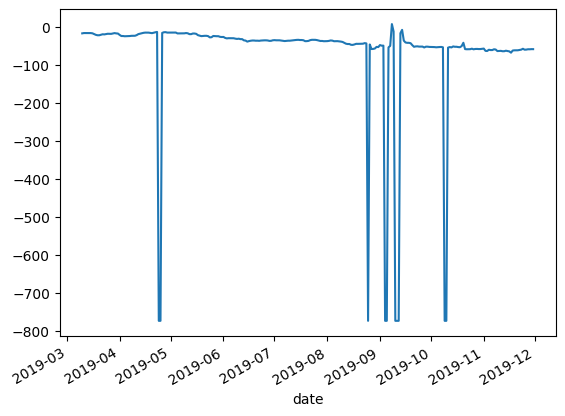

In [20]:
total_returns[62:].plot()

Symbol: VRSK


<Axes: >

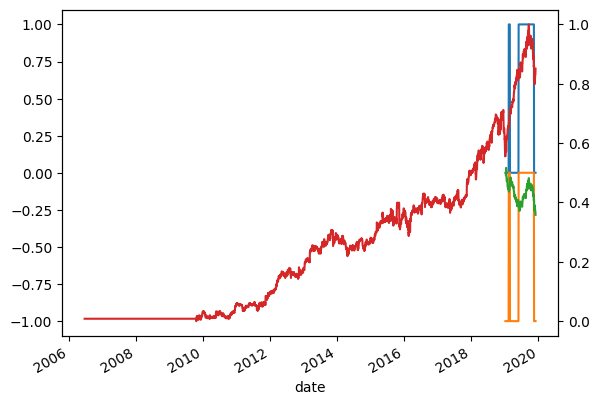

In [21]:
# Randomly pick a symbol from signals_long.columns
symbol = np.random.choice(signals_long.columns)
print(f"Symbol: {symbol}")
signals_long[symbol].plot()
signals_short[symbol].plot()
(strategy_returns_long[symbol].cumsum() + strategy_returns_short[symbol].cumsum()).plot()
# plot close[symbol].plot() on a new axis
close[symbol].plot(secondary_y=True)